# Wine Quality Check

1. Problem defination
Finding the quality of wine based on the previosly used wine data set

2.Data
using kaggle data of wine : https://archive.ics.uci.edu/ml/datasets/heart+disease

3.Evaluation
Building an model with atleast 70% of accuracy level

4.Features
Attribute Information:
several features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals

1. - fixed acidity    : Primary fixed acids found in wine are tartaric, succinic, citric, and malic
2. - volatile acidity : Volatile acidity is the gaseous acids present in wine
3. - citric acid      : It is weak organic acid, found in citrus fruits naturally.
4. - residual sugar   : Amount of sugar left after fermentation.
5. - chlorides        : Amount of salt present in wine.
6. - free sulfur dioxide : So2 is used for prevention of wine by oxidation and microbial spoilage.
7. - total sulfur dioxide : 
8. - density
9. - pH         : In wine pH is used for checking acidity
10. - sulphates : Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
11. - alcohol   : Percent of alcohol present in wine.

Output variable (based on sensory data):

12. - quality (score between 0 and 10)


# Prepapring the tools

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
import matplotlib.pyplot as plt, seaborn as sns
from imblearn.over_sampling import SMOTE

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.metrics import classification_report

In [3]:
# conda install -c conda-forge imbalanced-learn

### Study dataset

In [248]:
# Creating the dataframe and importing the data
df = pd.read_csv('data/winequalityN.csv')

In [230]:
df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2108,white,7.4,0.18,0.36,13.10,0.056,72.0,163.0,1.000000,3.42,0.35,9.1,6
3337,white,6.9,0.38,0.29,13.65,0.048,52.0,189.0,0.997840,3.00,0.60,9.5,6
4071,white,7.6,0.26,0.32,1.30,0.048,23.0,76.0,0.990300,2.96,0.46,12.0,6
4395,white,6.6,0.24,0.22,12.30,0.051,35.0,146.0,0.996760,3.10,0.67,9.4,5
2118,white,6.4,0.20,0.32,3.10,0.041,18.0,126.0,0.991400,3.43,0.42,12.0,6
3931,white,6.2,0.30,0.28,1.60,0.036,28.0,106.0,0.988245,3.14,0.41,13.3,6
4373,white,6.1,0.26,0.28,1.70,0.043,24.0,98.0,0.989180,3.14,0.44,12.5,6
5598,red,10.6,1.02,0.43,2.90,0.076,26.0,88.0,0.998400,3.08,0.57,10.1,6
393,white,7.3,0.24,0.43,2.00,0.021,20.0,69.0,0.990000,3.08,0.56,12.2,6
5777,red,7.2,0.60,0.04,2.50,0.076,18.0,88.0,0.997450,3.53,0.55,9.5,5


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [232]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Missing values

* As there are less null value either we can discard or fill with `fillna()` method

In [233]:
# Filling missing values
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [249]:
# we could fill with median if there is an imbalanced data set as mean is highly effected if the dataset in not balanced
df = df.fillna(df.mean())

/var/folders/75/klyg0gr558b_mjp32dgdzbvh0000gp/T/ipykernel_1605/1047171577.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [146]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visulazing the data

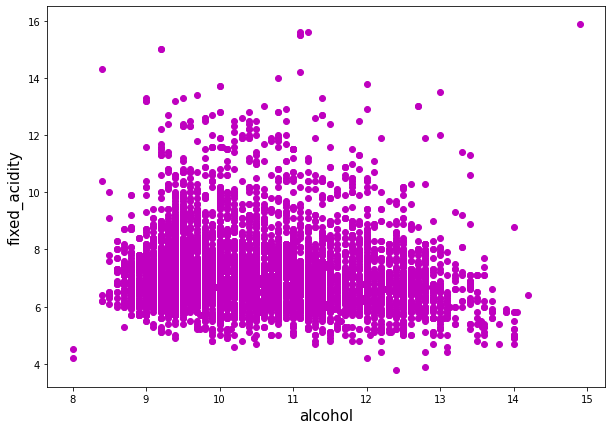

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =df,marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

[]

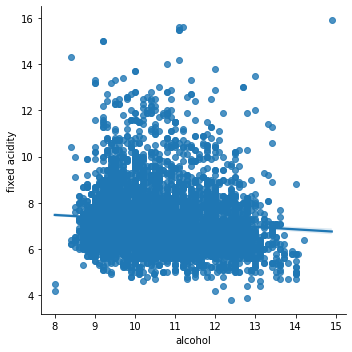

In [12]:
sns.lmplot(x="alcohol",y="fixed acidity",data=df)
plt.plot()

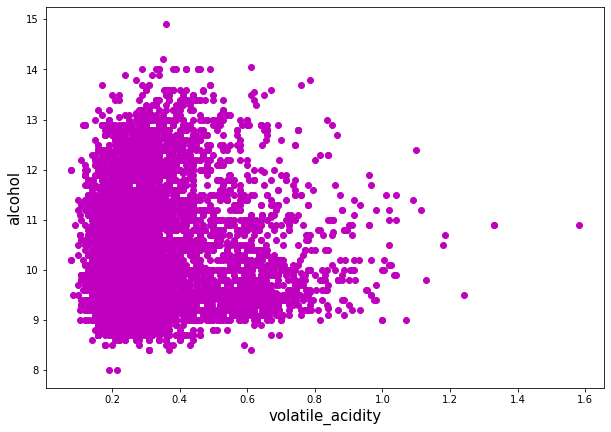

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(x="volatile acidity",y="alcohol",data =df,marker= 'o',c="m")
plt.xlabel("volatile_acidity",fontsize=15)
plt.ylabel("alcohol",fontsize=15)
plt.show()

/Users/Amazon/Documents/ml-course/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


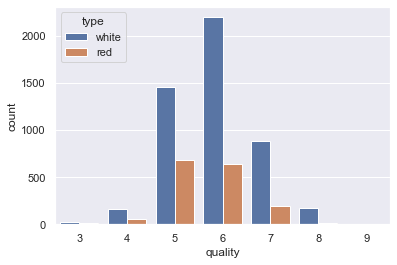

In [14]:
sns.set(style="darkgrid")
sns.countplot(df["quality"],hue="type",data=df)
plt.show()

/Users/Amazon/Documents/ml-course/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


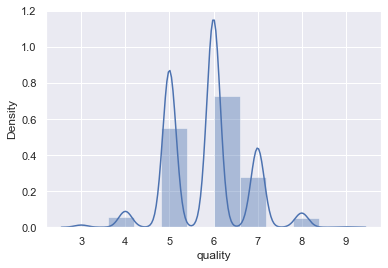

In [15]:
sns.set()
sns.distplot(df["quality"],bins=10)
plt.show()

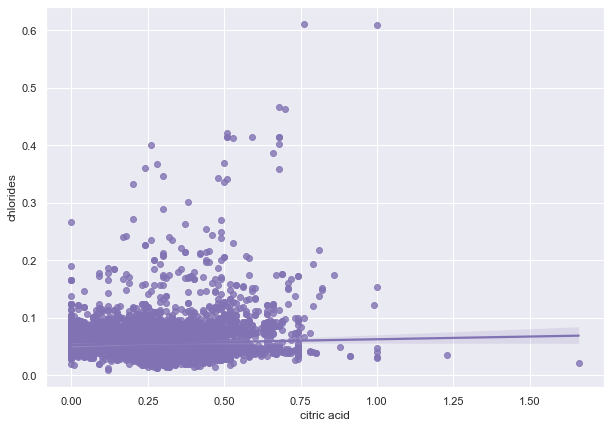

In [16]:
plt.figure(figsize=(10,7))
sns.regplot(x="citric acid",y="chlorides",data =df,marker= 'o',color="m")
plt.show()

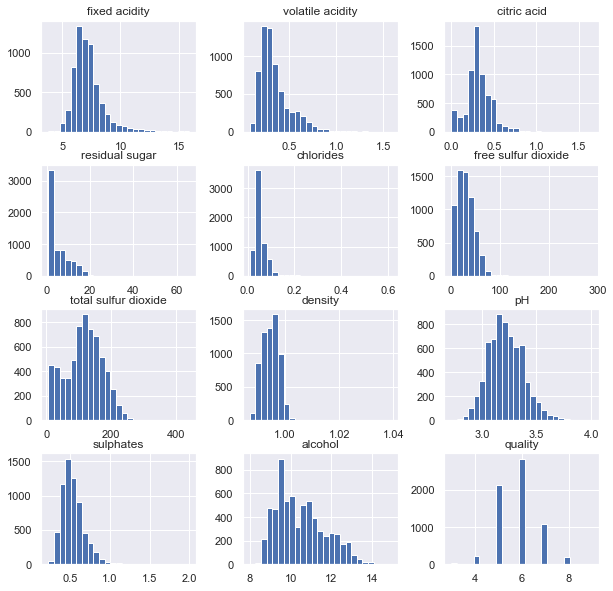

In [17]:
# Creating histogram
df.hist(bins = 25, figsize = (10,10))
# Display histogram of each feature
plt.show()

Text(0, 0.5, 'alcohol')

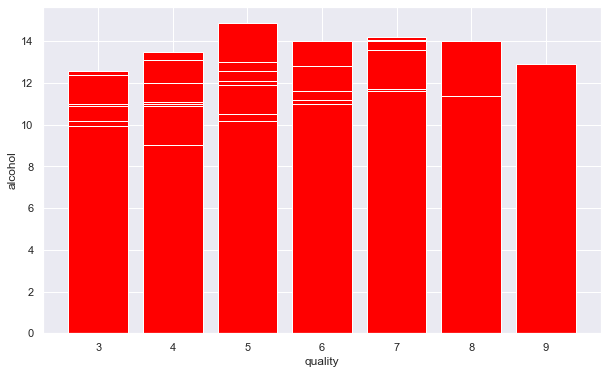

In [18]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

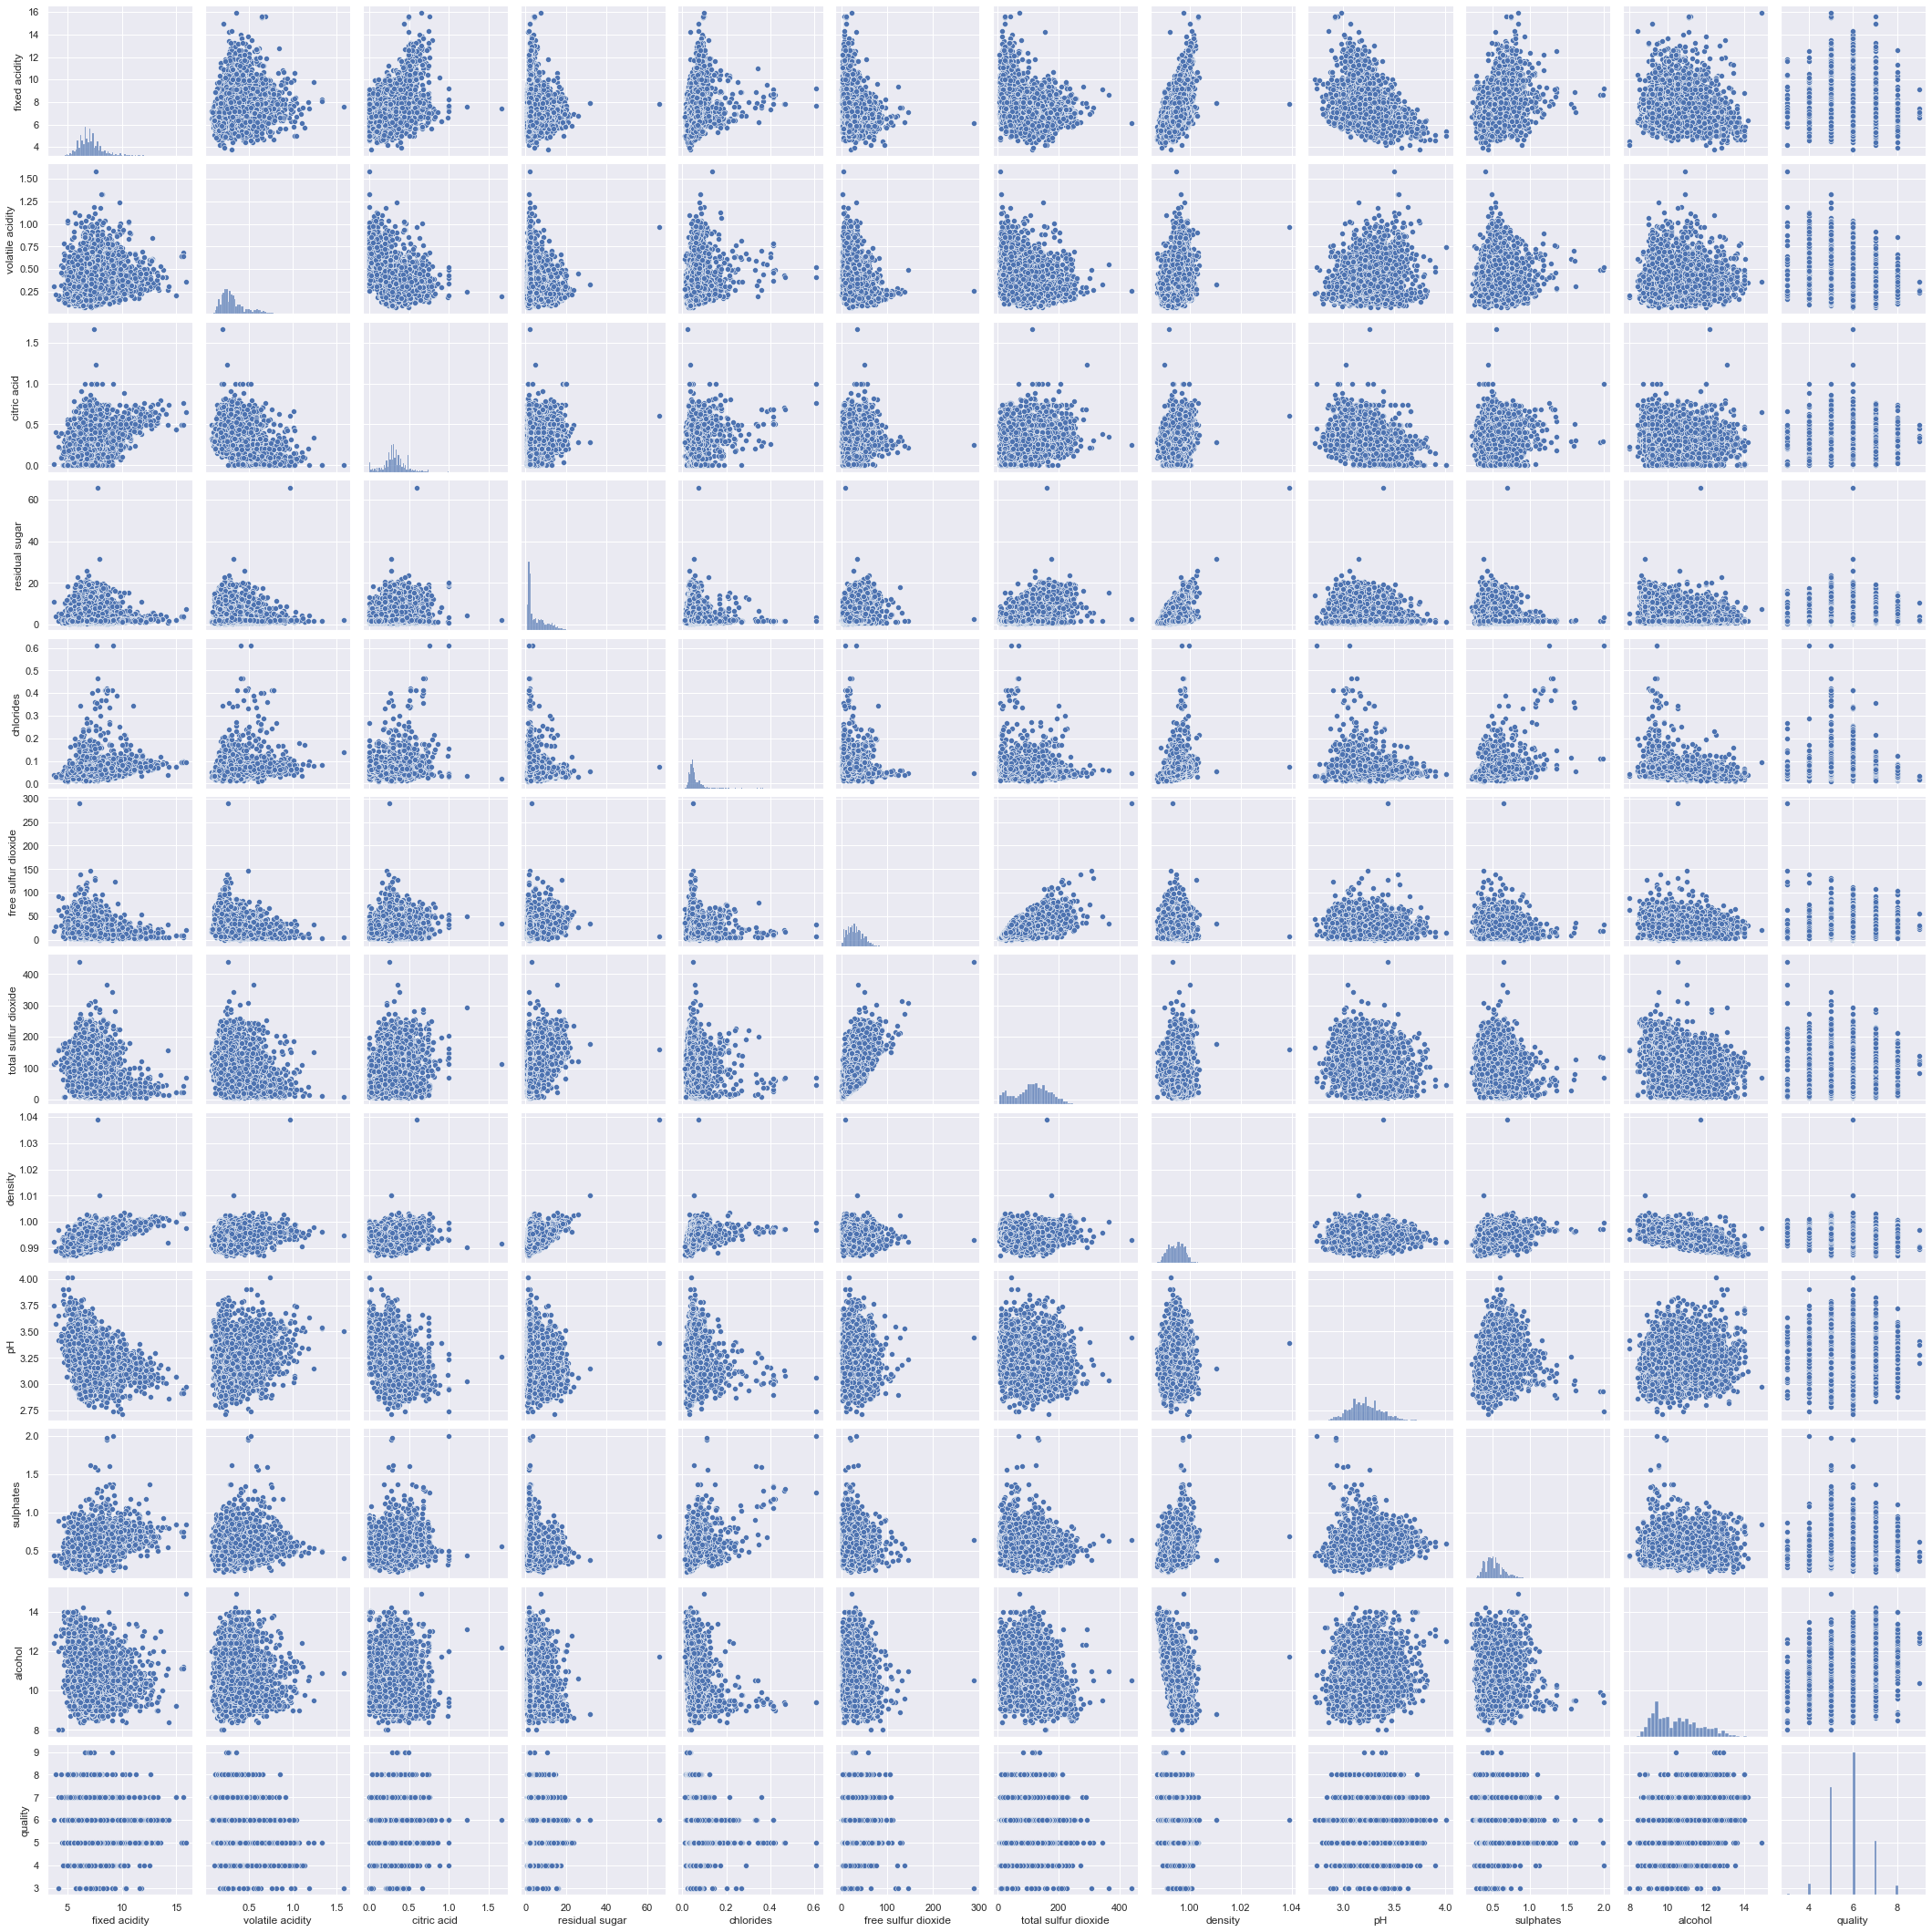

In [19]:
sns.set()
sns.pairplot(df)
plt.show()

# Outliers

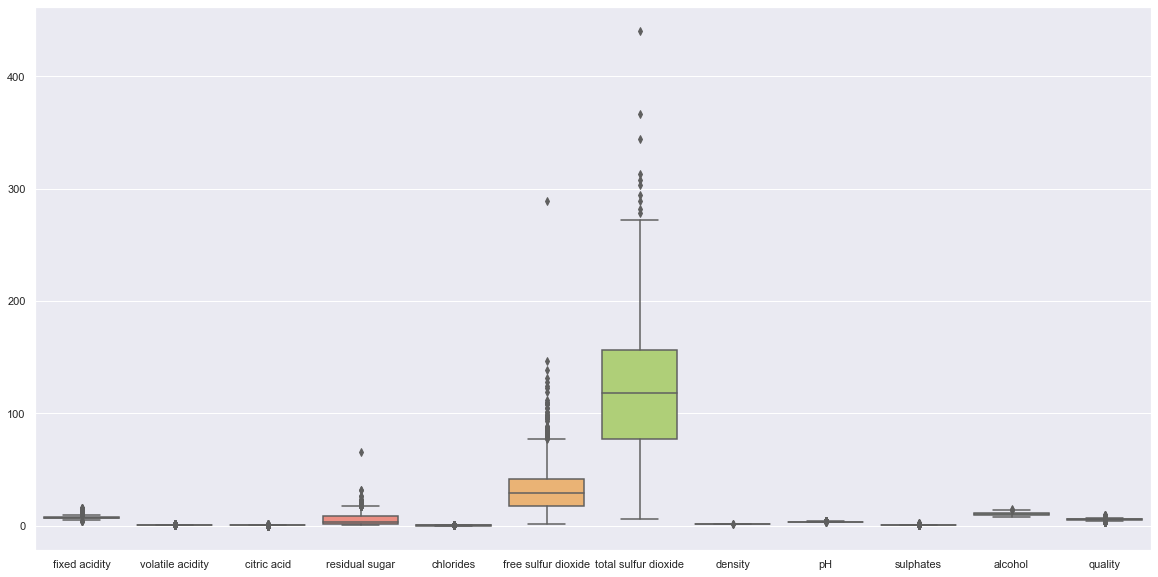

In [235]:
# Checking for outlier using box plot
def outlier_graph(df):
    sns.set()
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df,palette="Set3")
    plt.show()
outlier_graph(df)

In [250]:

categorical_columns = list(df.select_dtypes(include = 'object').columns)
numerical_columns = list(df.select_dtypes(exclude='object').columns)

categorical_columns, numerical_columns

(['type'],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

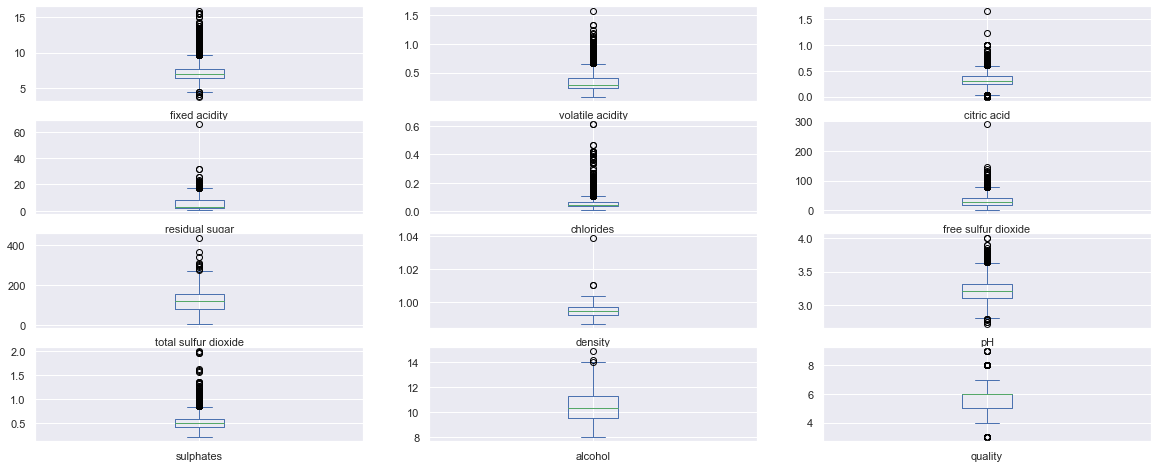

In [237]:
def outlier_graph_ind(df,numerical_columns):
    df[numerical_columns].plot(kind='box', subplots=True, layout=(4,3), legend=True, figsize=(20,8))
    plt.show()
outlier_graph_ind(df,numerical_columns)

As we see outliers , we can remove it

# Removing outliers from :

1. free sulfur dioxide
2. total sulfur dioxide
3. residual sugar

# Method 1 - manual

In [149]:
# Finding upper and lower limit with 3rd standard devation
lower_limit = df['free sulfur dioxide'].mean() - 3*df['free sulfur dioxide'].std()
upper_limit = df['free sulfur dioxide'].mean() + 3*df['free sulfur dioxide'].std()

In [150]:
print(lower_limit, upper_limit)

-22.722879937833156 83.77351869418224


In [151]:
# Removing the outliers
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

In [27]:
df.shape[0] - df2.shape[0]

36

# Method 2 - using scripting

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [239]:
# Separating numeric and catergorical values

categorical_columns = list(df.select_dtypes(include = 'object').columns)
numerical_columns = list(df.select_dtypes(exclude='object').columns)

categorical_columns, numerical_columns


(['type'],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [251]:
# Fucntion for removing the outliers with IQR interquantile range

def outlier_removal(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    new = df[(df[feature] >= lower) & (df[feature] <= upper)]
    
    return new


In [252]:
numerical_columns, type(numerical_columns)

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 list)

In [253]:
# calling the outlier_removal to remove outliers from the features
for columns in numerical_columns:
    df = outlier_removal(columns)
    

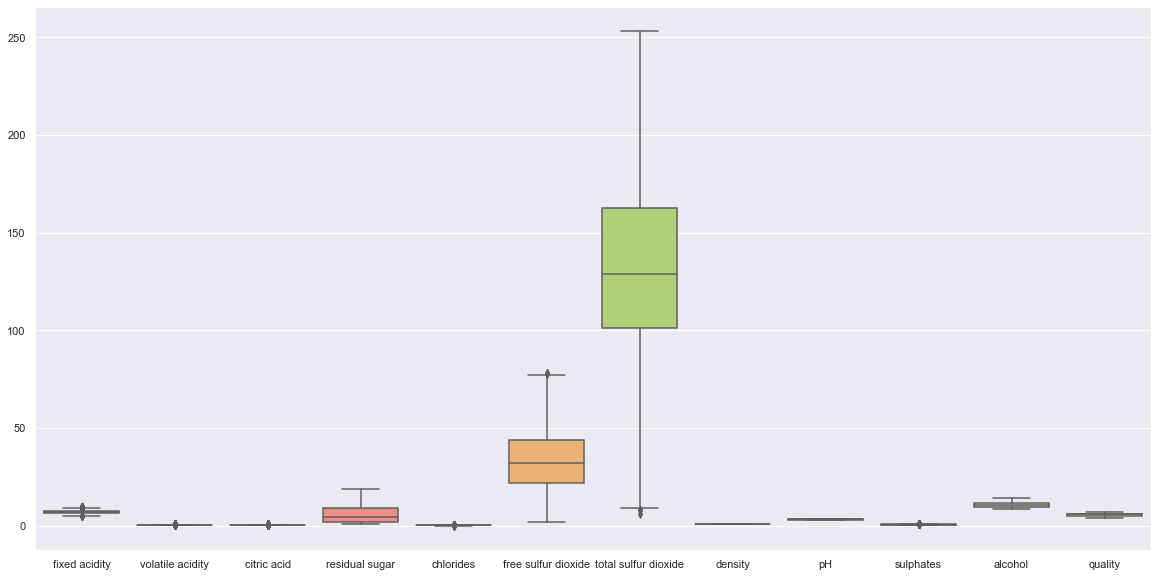

In [242]:
# Checking for outlier again
outlier_graph(df)

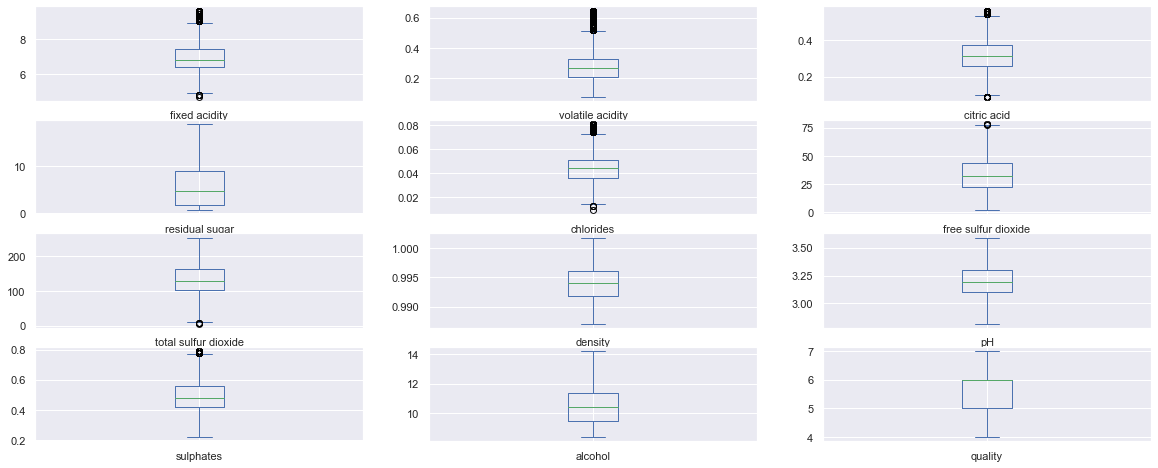

In [34]:
# Individual graph to check outlier
outlier_graph_ind(df,numerical_columns)

As ther are very less outliers compare to raw data

Till Now

**We have data having no NULL values and no Outliers**

# Now lets Change the Categorical 'String' Variables into Numerical Variables

In [254]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [255]:
df.quality.value_counts()

6    2097
5    1329
7     875
4     119
Name: quality, dtype: int64

In [256]:
d = df.copy()

In [257]:
# quality_mapping = { 4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
# df4["quality"] =  df4["quality"].map(quaity_mapping)

# df_dummies[''best quality''] = [ 1 if x>=7 else 0 for x in df.quality] 
# print(df_dummies)

quality_mapping = {4 : 'Low', 
                  5 : 'Medium',
                  6 : 'High',
                  7 : 'High'}
df['quality'] = df['quality'].map(quality_mapping)

In [258]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df["quality"] =  df["quality"].map(mapping_quality)

In [259]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


In [260]:
df.quality.value_counts()

2    2972
1    1329
0     119
Name: quality, dtype: int64

# Finding best Features

## Correlation

This will help to find features, how many features are there they correlated to each other

* For checking correlation we use a statistical method that finds the bonding and relationship between two features.

Note : 
While we calculate correlation matrix for a data frame, all the columns must be numerical, if that is not the case then we get an error Error in cor(“data_frame_name”) : 'x' must be numeric. To solve this problem, either we can find the correlations among variables one by one or use apply function.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4420 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4420 non-null   object 
 1   fixed acidity         4420 non-null   float64
 2   volatile acidity      4420 non-null   float64
 3   citric acid           4420 non-null   float64
 4   residual sugar        4420 non-null   float64
 5   chlorides             4420 non-null   float64
 6   free sulfur dioxide   4420 non-null   float64
 7   total sulfur dioxide  4420 non-null   float64
 8   density               4420 non-null   float64
 9   pH                    4420 non-null   float64
 10  sulphates             4420 non-null   float64
 11  alcohol               4420 non-null   float64
 12  quality               4420 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 483.4+ KB


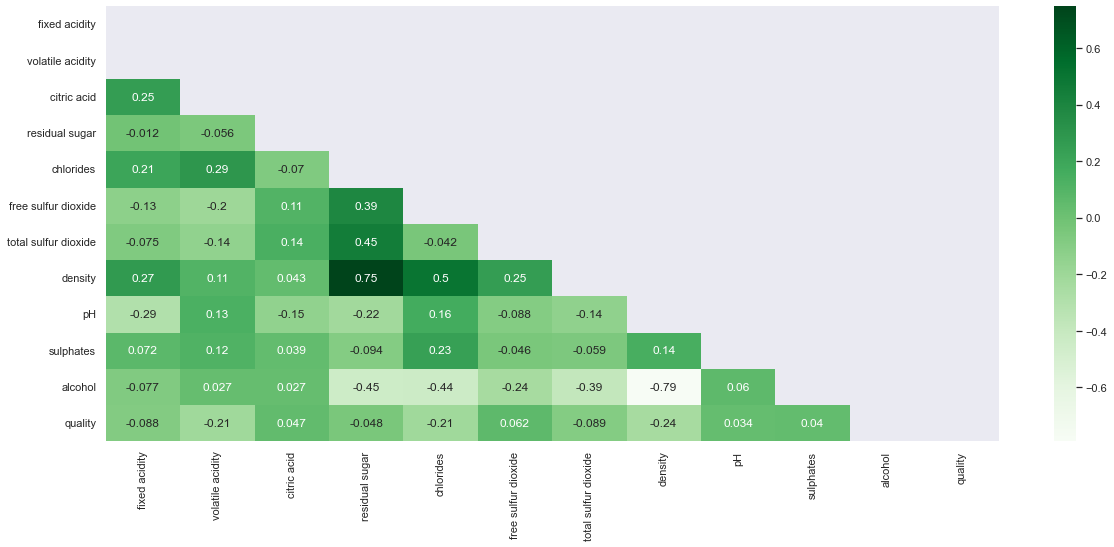

In [111]:
# Ploting half of the matrix
plt.figure(figsize=(20,8))
mask = np.triu(df.corr(),-1)
sns.heatmap(df.corr(), mask=mask, cmap='Greens', annot=True)
plt.show()

### Pearson's Correlation

In [112]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


# Imbalanced data

we have imbalanced data and also it have categorical one

we need to do 2 things
1. converting into numerical data - (onehotencoder, labelbianrizer, get_dummies etc)
2. SMOTE tech. to make data balanced

other tech. are 

1. under sampling
2. over sampling
3. combinatio of both
4. SMOTE

* 1 - white wine
* 0 - red wine

In [261]:
df.type.value_counts()

white    4067
red       353
Name: type, dtype: int64

In [158]:
lb = LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

# Converting the catergorical to numerical values

In [115]:
# new_df.type = y

In [116]:
# new_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,2
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,2
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,2
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,2
5,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,2
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,2
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1


In [117]:
# correlation = pd.DataFrame(columns=["Relation of 'type' with", "Pearson's correnation value"])

In [118]:
# correlation

,Relation of 'type' with,Pearson's correnation value


In [262]:
lb = LabelBinarizer()
y = lb.fit_transform(df.type)
new_df = df.copy()
new_df.type = y
correlation = pd.DataFrame(columns=["Relation of 'type' with", "Pearson's correnation value"])

for index, feature in enumerate(numerical_columns):
    corr, _ = pearsonr(new_df.type, new_df[feature])
    correlation.loc[index] = [feature, corr]
    
correlation = correlation.sort_values("Pearson's correnation value", ascending= False)

In [263]:
correlation

,Relation of 'type' with,Pearson's correnation value
6,total sulfur dioxide,0.496181
5,free sulfur dioxide,0.295746
3,residual sugar,0.221622
2,citric acid,0.134102
11,quality,0.051570
10,alcohol,0.007646
7,density,-0.191006
0,fixed acidity,-0.245085
8,pH,-0.292251
9,sulphates,-0.326880


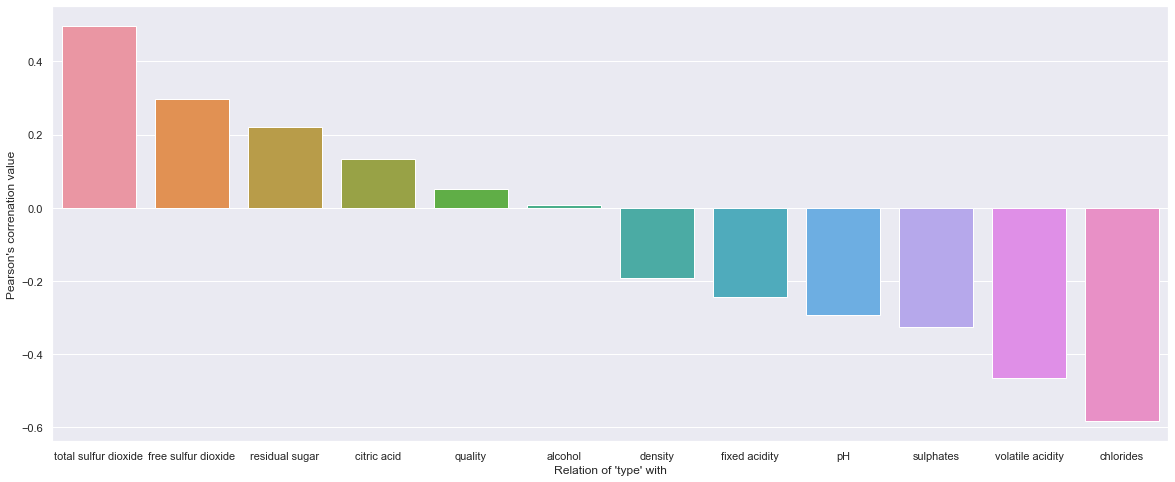

In [264]:
# Visulazing the correlation 
plt.figure(figsize = (20,8))
sns.barplot(x = correlation["Relation of \'type\' with"], y = correlation["Pearson\'s correnation value"])
plt.show()

Here we can see `total sulfur dioxide` is higly correlated with `chlorides`

# Continue with Spliting of dataset

### Method 2 - Finding correlation using correlation matrix

**Find the features which are highly correlated,
with the help of this, we can reduce the no. of features,
We are discarding that features, as they are equally contributing to the accuracy of the model**

In [185]:
# df1 = pd.read_csv('data/winequalityN.csv')

In [186]:
# df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


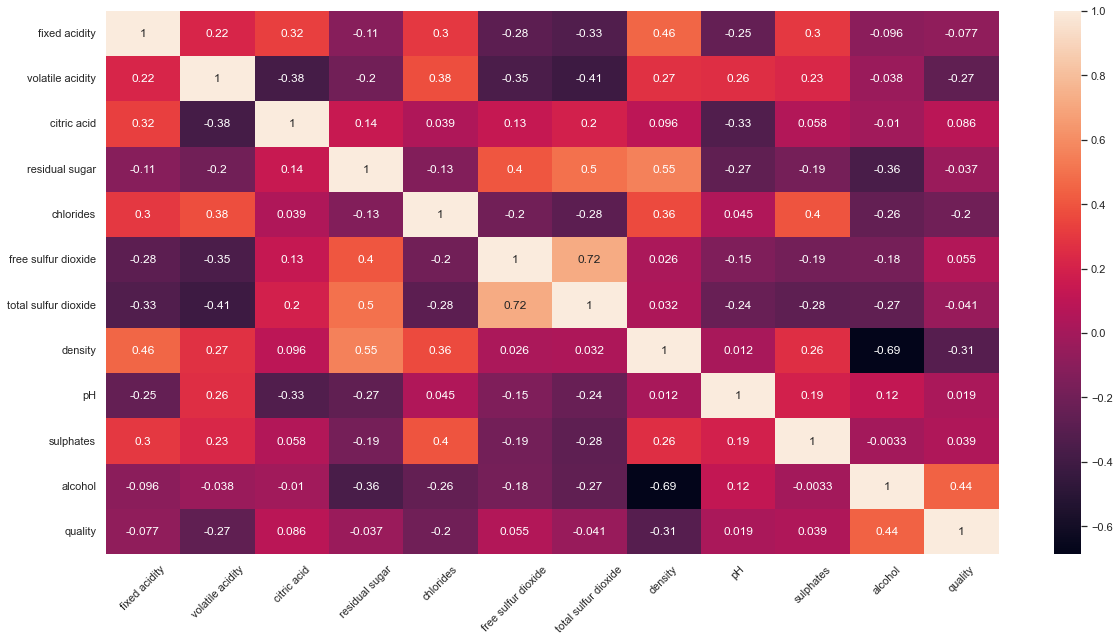

In [187]:
# fig, ax = plt.subplots(figsize = (20,10))
# ax = sns.heatmap(df1.corr(), annot= True)
# plt.xticks(rotation = 45)
# plt.show();

In [188]:
df1.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [180]:
# def corr_feat(dataframe, thresold=0.7):
#     """
#     Take the dataset as dataFrame and thresold value and return an set of columns which are highly correlated,
#     we can drop the columns if needed"""
#     corr_features = set() # to avoid duplicated  
#     corr_matrix = dataframe.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j]) > thresold:
#                 feature = corr_matrix.columns[i]
#                 corr_features.add(feature)
#     return list(corr_features)

This is a python script for finding the correlated feature, as we set the thresold value 0.7 i.e any features that is 70% correlated to each other, we consider the feature is highly correlated, and we can delete that feauture

**However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.**

In [189]:
# corr_features = corr_feat(df1,thresold=0.7)

In [190]:
# corr_features

['total sulfur dioxide']

In [192]:
# Removing the correalated value
# df_2=df.drop('total sulfur dioxide',axis=1)

In [193]:
# df_2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [196]:
# Filling the null value
# df_2.update(df_2.fillna(df_2.mean()))

/var/folders/75/klyg0gr558b_mjp32dgdzbvh0000gp/T/ipykernel_1605/2788249983.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2.update(df_2.fillna(df_2.mean()))


In [198]:
# df_2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [201]:
# # catogerical vars 
# next_df = pd.get_dummies(df_2,drop_first=True)
# # display new dataframe
# next_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [203]:
# next_df["best quality"] = [ 1 if x>=7 else 0 for x in df.quality] 


In [205]:
# next_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,best quality
4556,6.1,0.20,0.40,1.9,0.028,32.0,0.99140,3.26,0.72,11.7,5,1,0
4297,7.0,0.20,0.35,8.8,0.037,31.0,0.99388,3.13,0.49,11.0,6,1,0
2076,6.8,0.36,0.32,1.6,0.039,10.0,0.99480,3.30,0.67,9.6,5,1,0
4428,6.9,0.44,0.27,5.0,0.038,33.0,0.99124,3.20,0.42,12.2,6,1,0
566,7.2,0.35,0.34,12.4,0.051,6.0,0.99440,3.13,0.39,11.5,6,1,0


# Splitting dataset - 

continuing with new_df 


In [344]:
new_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


In [223]:
new_df.isna().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [332]:
new_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


# Method 1 

In [287]:
# X = new_df.drop('quality', axis = 1)
# y = new_df['quality']

In [312]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [313]:
# X_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3179,1,8.5,0.20,0.40,1.1,0.046,31.0,106.0,0.99194,3.00,0.35,10.5
15,1,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.99140,3.25,0.55,11.4
4122,1,6.2,0.34,0.25,12.1,0.059,33.0,171.0,0.99769,3.14,0.56,8.7
4150,1,7.6,0.48,0.31,9.4,0.046,6.0,194.0,0.99714,3.07,0.61,9.4
5057,0,6.8,0.60,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3


In [331]:
# y_train.value_counts()

2    2079
1     929
0      86
Name: quality, dtype: int64

# Method 2

In [354]:
new_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


In [355]:
new_df.type.value_counts()

1    4067
0     353
Name: type, dtype: int64

In [356]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_df, train_size=0.7, random_state=100, stratify=df.type)

In [357]:
X_train_1 = train[numerical_columns]
y_train_1 = train.type

X_test_1 = test[numerical_columns]
y_test_1 = test.type

In [358]:
X_train_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1025,6.2,0.150,0.46,1.60,0.039,38.0,123.0,0.99300,3.38,0.51,9.700000,2
1251,5.7,0.245,0.33,1.10,0.049,28.0,150.0,0.99270,3.13,0.42,9.300000,1
4364,6.4,0.290,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,2
4499,5.2,0.380,0.26,7.70,0.053,20.0,103.0,0.99250,3.27,0.45,12.200000,2
2947,5.1,0.290,0.28,8.30,0.026,27.0,107.0,0.99308,3.36,0.37,11.000000,2


In [359]:
X_train_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1025,6.2,0.150,0.46,1.60,0.039,38.0,123.0,0.99300,3.38,0.51,9.700000,2
1251,5.7,0.245,0.33,1.10,0.049,28.0,150.0,0.99270,3.13,0.42,9.300000,1
4364,6.4,0.290,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,2
4499,5.2,0.380,0.26,7.70,0.053,20.0,103.0,0.99250,3.27,0.45,12.200000,2
2947,5.1,0.290,0.28,8.30,0.026,27.0,107.0,0.99308,3.36,0.37,11.000000,2


In [360]:
y_train_1.head()

1025    1
1251    1
4364    1
4499    1
2947    1
Name: type, dtype: int64

In [361]:
y_train_1.value_counts()

1    2847
0     247
Name: type, dtype: int64

As the output is imbalanced, i.e we have less red wine comapre to white wine,

# Data is imbalanced 

In [362]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train_1, y_train_1)

y_smote.value_counts()

1    2847
0    2847
Name: type, dtype: int64

As we see the data is balanced now, let normalize the data, to bring them on smale scale

# Nomalization - scaling

In [365]:
numerical_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [366]:
x_smote.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.306122,0.125000,0.787234,0.054496,0.416667,0.466667,0.473684,0.388350,0.727273,0.508772,0.218182,1.0
1,0.204082,0.294643,0.510638,0.027248,0.555556,0.333333,0.582996,0.367545,0.402597,0.350877,0.145455,0.5
2,0.346939,0.375000,0.255319,0.493188,0.444444,0.440000,0.457490,0.411928,0.220779,0.210526,0.442424,1.0
3,0.102041,0.535714,0.361702,0.386921,0.611111,0.226667,0.392713,0.353675,0.584416,0.403509,0.672727,1.0
4,0.081633,0.375000,0.404255,0.419619,0.236111,0.320000,0.408907,0.393897,0.701299,0.263158,0.454545,1.0


In [367]:
scaler = MinMaxScaler()

# Finding the pattern in train set
x_smote[numerical_columns] = scaler.fit_transform(x_smote[numerical_columns])

# applying the pattern found to test set
X_test[numerical_columns] = scaler.transform(X_test_1[numerical_columns])

# Lets Select the best Features for our Model

In [286]:
# new_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


In [281]:
# test_df = new_df.copy()

In [282]:
# x = test_df.drop("quality",axis=True)
# y = test_df["quality"]

In [283]:
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()
# model.fit(x,y)


ExtraTreesClassifier()

In [284]:
# print(model.feature_importances_)

[0.00590773 0.07571182 0.10319047 0.08415755 0.07876565 0.08509185
 0.08768813 0.0836962  0.10021729 0.07756371 0.07622525 0.14178435]


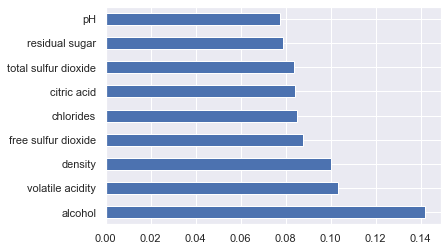

In [285]:
# feat_importances = pd.Series(model.feature_importances_,index =x.columns)
# feat_importances.nlargest(9).plot(kind="barh")
# plt.show()

As graph show alcohal, volatile acidiy are contribute more for predicting the quality of wine

# Modeling

## Now Let's select the best model for our Dataset

In [317]:
# lr = LogisticRegression(random_state=22)
# folds = KFold(n_splits=5, shuffle=True, random_state=45)
# score = cross_val_score(estimator=lr, X=x_smote, y=y_smote, scoring='accuracy', cv=folds, n_jobs=-1)
# score.mean()

In [319]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# Hyperparameter tuning

In [324]:
# model_params = {
#     'decision_tree' : {
#         'model': DecisionTreeClassifier(),
#         'params' : {
#             'criterion' :['entropy','gini'],
#             'max_depth' : [5,8,9]
#         }
#     },
    
#     'random_forest':{
#         'model' : RandomForestClassifier(),
#         'params':{
#             'n_estimators':[1,5,10],
#             'max_depth':[5,8,9],
#         }
#     },
    
#     'naive_bayes':{
#         'model':GaussianNB(),
#         'params':{}
#     },
    
#     'logistic_regression' : {
#       'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
#         'params':{
#             'C': [1,5,10]
#         }
#     },
    
    
#     'svm':{
#         'model':SVC(gamma='auto'),
#         'params':{
#             'C':[1,10,20],
#             'kernel':['rbf']
#         }
#     }
# }

In [325]:
# score=[]

# for model_name,mp in model_params.items():
#     clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
#     clf.fit(x,y)
#     score.append({
#         "Model" : model_name,
#         "Best_Score": clf.best_score_,
#         "Best_Params": clf.best_params_
#     })

In [326]:
# df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [327]:
# df5

,Model,Best_Score,Best_Params
0,decision_tree,0.708164,"{'criterion': 'entropy', 'max_depth': 5}"
1,random_forest,0.722412,"{'max_depth': 8, 'n_estimators': 10}"
2,naive_bayes,0.644555,{}
3,logistic_regression,0.711777,{'C': 10}
4,svm,0.677620,"{'C': 1, 'kernel': 'rbf'}"


In [368]:
lr = LogisticRegression(random_state=22)
folds = KFold(n_splits=5, shuffle=True, random_state=45)
score = cross_val_score(estimator=lr, X=x_smote, y=y_smote, scoring='accuracy', cv=folds, n_jobs=-1)
score.mean()

0.9868291644228974

In [370]:
lr.fit(x_smote, y_smote)
test['predicted_type'] = lr.predict(X_test_1)

In [371]:
print(classification_report(y_test, test.predicted_type))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.30      1.00      0.46       400
           2       0.00      0.00      0.00       893

    accuracy                           0.30      1326
   macro avg       0.10      0.33      0.15      1326
weighted avg       0.09      0.30      0.14      1326



/Users/Amazon/Documents/ml-course/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Amazon/Documents/ml-course/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Amazon/Documents/ml-course/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,